In [1]:
import toml
import torch
import matplotlib.pyplot as plt
from fastai.callback.schedule import combined_cos

In [2]:
from IPython.display import Image

# Model Training

This jupyter notebook gives an overview how to train a deep learning model using the radionets framework. For the deep learning model training the executable `radionets_training <...>` is used, which is added to your path when installing the radionets package. 

## Training Config

Again, all necessary options and paths have to be set in a configuration file. In this example we will use the `default_train_config.toml`.

In [3]:
config_path = "./default_train_config.toml"
train_conf = toml.load(config_path)
train_conf.keys()

dict_keys(['title', 'mode', 'paths', 'general', 'hypers', 'param_scheduling'])

The config file is divided into following parts:
* mode
* paths
* general
* hypers
* param_scheduling

### mode

In this section, three options are available. One is he possibility to enable `quiet`. This is necessary when you are running the analysis on a machine with queuing systems like `slurm`. It will disable all user input prompts. With the `gpu` keyword you can enable to use a gpu device for the training. The last option is to enable the `telegram_logger`, which will send training information to a telegram bot. Before this feature can be used, the telegram logger has to be configured. Detailed instructions can be found in [has to be specified!].

In [4]:
train_conf["mode"]

{'quiet': True, 'gpu': False, 'telegram_logger': False}

### paths

This part of the config file is used to set the different data and model paths. You can specify the `data_path` to the simulations which shall be used for the training. The `model_path` defines where the model weights are saved after the training process is completed. Furthermore, there are the options to load a `pre_model` before the training and to pass a `norm_path` with values to normalize all batches before they are passed to the network.

In [5]:
train_conf["paths"]

{'data_path': './example_data/',
 'model_path': './build/example_model/example.model',
 'pre_model': 'none',
 'norm_path': 'none'}

### general

In this section, some general options have to be specified. First of all, you can define wheter the used dataset is a `fourier` datset or not. Furthermore, it must be set if the used dataset is a `source_list` one. For the architecture a `arch_name` from the list of defined architectures can be indicated. The some applies to the `loss_func`. The network will be trained for `num_epochs`. When enabling the inspection option a bunch of example predictions will be generated after the training process is finished. The `output_format` for the inspection plot can be specified. A list of all available architectures and loss functions can be found in [Archs&Losses](Archs&Losses.ipynb)

In [6]:
train_conf["general"]

{'fourier': True,
 'amp_phase': True,
 'source_list': False,
 'arch_name': 'filter_deep',
 'loss_func': 'splitted_mse',
 'num_epochs': 5,
 'inspection': True,
 'separate': False,
 'output_format': 'png'}

### hypers

Here, the hyper parameters are defined. These are the learning rate `lr` and the `batch_size`.

In [7]:
train_conf["hypers"]

{'batch_size': 100, 'lr': 0.001}

### param_scheduling

Instead of a static learning rate, an adaptive one can be used by enabling this option. A combined cosine shape shown in the image below will be used to adjust the learning rate over the training process. `lr_start`, `lr_max` and `lr_stop` can be specified in this section of the config file.

In [8]:
train_conf["param_scheduling"]

{'use': True, 'lr_start': 0.07, 'lr_max': 0.3, 'lr_stop': 0.05}

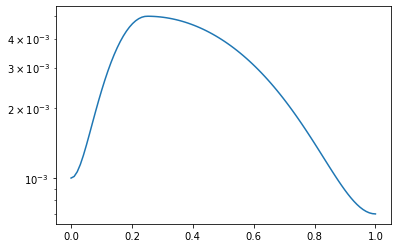

In [9]:
f = combined_cos(0.25,1e-3,5e-3,7e-4)
p = torch.linspace(0.,1,100)
plt.plot(p, [f(o) for o in p]);
plt.yscale("log")

## Training of a Neural Network

Starting the training process with the default config file.

In [10]:
!radionets_training ./default_train_config.toml


 Train config:
{'data_path': './example_data/', 'model_path': './build/example_model/example.model', 'pre_model': 'none', 'norm_path': 'none', 'quiet': True, 'gpu': False, 'telegram_logger': False, 'bs': 100, 'lr': 0.001, 'fourier': True, 'amp_phase': True, 'arch_name': 'filter_deep', 'loss_func': 'splitted_mse', 'num_epochs': 5, 'inspection': True, 'separate': False, 'format': 'png', 'param_scheduling': True, 'lr_start': 0.07, 'lr_max': 0.3, 'lr_stop': 0.05, 'source_list': False} 

Overwriting existing model file!
Start training of the model.

[0, 58.79018783569336, 367.5489807128906, '01:56']
[1, 34.29408645629883, 22.742719650268555, '01:55']
[2, 26.68950653076172, 19.91197967529297, '01:56']
[3, 20.21199607849121, 14.046035766601562, '01:55']
[4, 14.882253646850586, 10.533098220825195, '01:55']

Plotting Loss for: example


Load pretrained model: example



### Creating the Loss Plot

At the end of the training process the loss plot is created automatically. Nethertheless, it can also be created using `--mode=plot_loss` for the `radionets_training` executable.

In [11]:
!radionets_training --mode=plot_loss ./default_train_config.toml


 Train config:
{'data_path': './example_data/', 'model_path': './build/example_model/example.model', 'pre_model': 'none', 'norm_path': 'none', 'quiet': True, 'gpu': False, 'telegram_logger': False, 'bs': 100, 'lr': 0.001, 'fourier': True, 'amp_phase': True, 'arch_name': 'filter_deep', 'loss_func': 'splitted_mse', 'num_epochs': 5, 'inspection': True, 'separate': False, 'format': 'png', 'param_scheduling': True, 'lr_start': 0.07, 'lr_max': 0.3, 'lr_stop': 0.05, 'source_list': False} 

Start plotting loss.


Load pretrained model: example


Plotting Learning rate for: example


Plotting Loss for: example



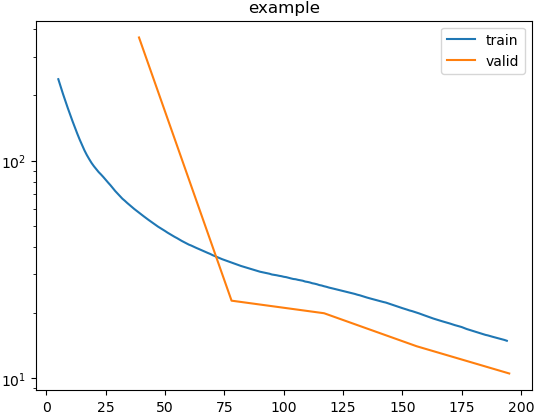

In [12]:
Image(data="./build/example_model/example_loss.png", width=600, height=450)

### Example Predictions

When using the `inspection=True` example predictions are created after the training process is finished. These can be found in the model directory.

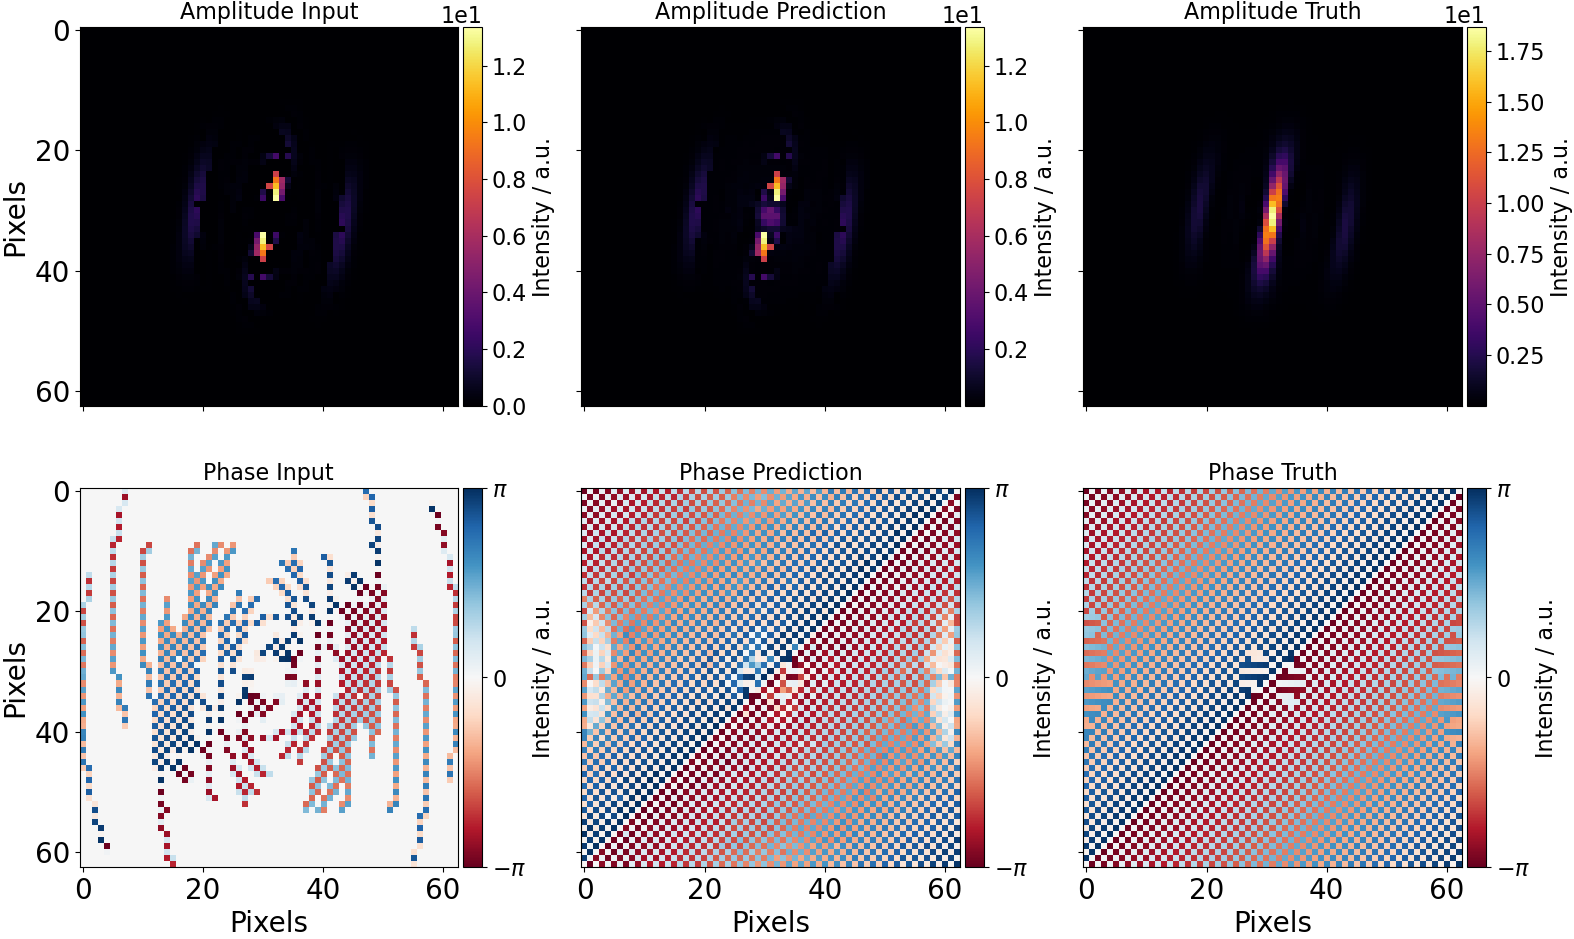

In [13]:
Image(data="./build/example_model/evaluation/prediction_0.png", width=800, height=450)

### Find LR

Another feature is the find learning rate functionality, which uses the implementation from [fastai](https://github.com/fastai/fastai). The created plot can be used to get an idea of the best suited learning rate for the training process. It can be enabled by using the `radionets_training` executable with `--mode=lr_find`.

In [14]:
!radionets_training --mode=lr_find ./default_train_config.toml


 Train config:
{'data_path': './example_data/', 'model_path': './build/example_model/example.model', 'pre_model': 'none', 'norm_path': 'none', 'quiet': True, 'gpu': False, 'telegram_logger': False, 'bs': 100, 'lr': 0.001, 'fourier': True, 'amp_phase': True, 'arch_name': 'filter_deep', 'loss_func': 'splitted_mse', 'num_epochs': 5, 'inspection': True, 'separate': False, 'format': 'png', 'param_scheduling': True, 'lr_start': 0.07, 'lr_max': 0.3, 'lr_stop': 0.05, 'source_list': False} 

Start lr_find.


Plotting Lr vs Loss for architecture: filter_deep



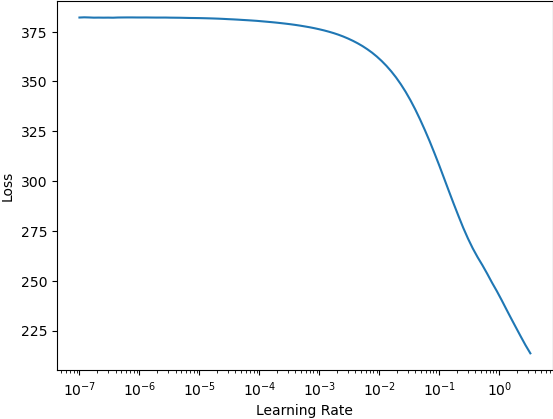

In [15]:
Image(data="./build/example_model/lr_loss.png", width=800, height=450)

It is recommended to choose the learning rate where the loss curve has the steepest gradient.